In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from scipy.stats import gaussian_kde

In [12]:
# confirm that our files exist, and that the number of examples is in line with
#   our expectations. This also shows the number of source-target pairs. 
dataset_path = Path("../dublin/150")
dataset_files = [f for f in dataset_path.glob("neighborhoods/*.txt.gz")]
example_counts = {}
for example in dataset_files:
    src, target, intensity, _ = str(example.stem).split("_")
    if (src, target) not in example_counts:
        example_counts[(src, target)] = 1
    else:
        example_counts[(src, target)] += 1

totals = []
for key, val in example_counts.items():
    print(f"{key}: {val}")
    totals.append(val)

print(f"Mean: {np.mean(totals)}\tVariance: {np.std(totals)}")

('8', '8'): 51274
('2', '2'): 51194
('32', '32'): 51484
('35', '35'): 51123
('30', '30'): 51182
('32', '1'): 50834
('12', '1'): 51001
('16', '16'): 51063
('39', '1'): 51006
('35', '1'): 51018
('21', '1'): 51022
('40', '1'): 50981
('10', '1'): 50819
('8', '1'): 50498
('22', '22'): 51055
('26', '26'): 51153
('10', '10'): 51237
('0', '0'): 51412
('11', '1'): 50479
('6', '6'): 51386
('27', '27'): 51310
('21', '21'): 51038
('37', '37'): 51378
('30', '1'): 51047
('27', '1'): 50870
('19', '1'): 50565
('40', '40'): 51158
('20', '1'): 51036
('19', '19'): 51240
('7', '1'): 51049
('34', '34'): 51439
('34', '1'): 50785
('11', '11'): 51029
('37', '1'): 48461
('15', '1'): 51013
('16', '1'): 50733
('9', '1'): 50817
('26', '1'): 49446
('12', '12'): 51068
('4', '1'): 50889
('22', '1'): 50930
('6', '1'): 51027
('4', '4'): 51308
('39', '39'): 51347
('7', '7'): 51187
('20', '20'): 51215
('15', '15'): 51285
('0', '1'): 50861
('2', '1'): 42569
('9', '9'): 51223
Mean: 50810.88	Variance: 1271.9233725346824


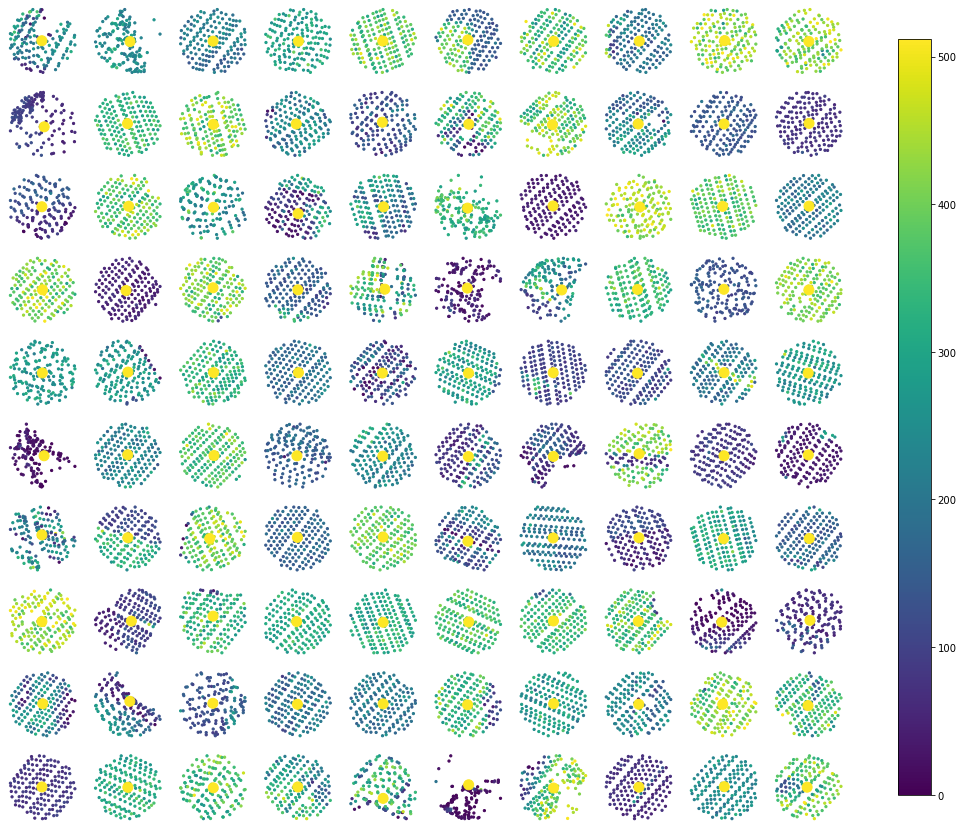

In [7]:
# Dataset visualization. Confirm that our "center point" is the center. A few
#   of these might not be perfect, but the vast majority should be reasonable.
x = 10
y = 10
matplotlib.rcParams['figure.figsize'] = [x*1.5, y*1.5]
fig, ax = plt.subplots(y, x)
for i in range(y):
    for j in range(x):
        example = np.loadtxt(dataset_files[i*10 + j])
        # Adjust the gt-center to be more visible
        center = np.ones((example.shape[0])) * 5
        center[0] = 100
        intensity = example[:, 3]
        intensity[0] = 512
        s = ax[i][j].scatter(np.flip(example[:, 0]), 
                             np.flip(example[:, 1]), 
                             s=np.flip(center), 
                             c=np.flip(example[:, 3]), 
                             vmin=0, 
                             vmax=512)
        ax[i][j].axis('off')


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

